<a href="https://colab.research.google.com/github/daekee0325/DataSciencePractices/blob/master/stockdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
!pwd

/content


In [0]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [7]:
X_train

array([[[ 0.        ],
        [-0.0052427 ],
        [-0.01660456],
        ...,
        [-0.10712269],
        [-0.10092972],
        [-0.11768178]],

       [[ 0.        ],
        [-0.00323034],
        [-0.00107906],
        ...,
        [-0.01965533],
        [-0.01420374],
        [-0.01676133]],

       [[ 0.        ],
        [-0.01240414],
        [-0.01862901],
        ...,
        [ 0.03350886],
        [ 0.04093566],
        [ 0.04352229]],

       ...,

       [[ 0.        ],
        [ 0.0003427 ],
        [-0.00806228],
        ...,
        [-0.03457602],
        [-0.0367314 ],
        [-0.02740654]],

       [[ 0.        ],
        [ 0.00130164],
        [ 0.00209867],
        ...,
        [-0.0042193 ],
        [-0.00664708],
        [-0.02342913]],

       [[ 0.        ],
        [-0.0013321 ],
        [ 0.00128794],
        ...,
        [-0.03341685],
        [-0.03296704],
        [-0.02523033]]])

In [8]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

W0726 12:24:45.453830 139922798593920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 12:24:45.503317 139922798593920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 12:24:45.517225 139922798593920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 12:24:45.747670 139922798593920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 12:24:45.758528 

compilation time :  0.0286750793457


In [9]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

W0726 12:24:57.188843 139922798593920 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 12:24:58.445339 139922798593920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 6s 2ms/step - loss: 0.0036 - val_loss: 0.0012


yo


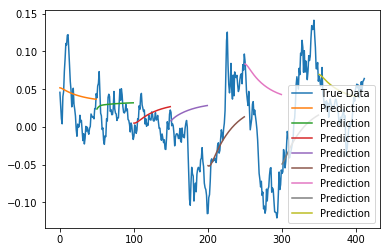

In [10]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)